In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/My Drive/"

'23-24 All Stats.xlsm'		   'Jonathan Lawrence Tarea Escrita.gdoc'
'ACS Low Fidelity Prototype.gjam'  'Jonny Letter of Recom-J Marcello (1).docx'
'ACS Use Case Diagram.gjam'	   'Jonny Letter of Recom-J Marcello (2).docx'
'AP Exam Powerpoint.pptx'	   'Jonny Letter of Recom-J Marcello.docx'
'AP Exam Powerpoint.pptx.gslides'  'Mr. Kotkin Letter of Recom.pdf'
'Colab Notebooks'		   'Ms. Marcello Letter of Recom.docx'
'Furman Acceptance Letter1.pdf'    'PA4 Division of Labor.gdoc'
'Getting started.pdf'		   'Spanish Homework.gdoc'


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.ExcelFile('/content/drive/My Drive/23-24 All Stats.xlsm')

In [9]:
relevant_sheets = [sheet for sheet in data.sheet_names if '-' in sheet]
all_sheets_data = []
for name in relevant_sheets:
  sheet_data = pd.read_excel('/content/drive/My Drive/23-24 All Stats.xlsm', sheet_name=name, skiprows=9)
  sheet_data['sheet_name'] = name
  all_sheets_data.append(sheet_data)

all_concat = pd.concat(all_sheets_data)

In [10]:
all_concat['sheet_name'] = pd.to_datetime(all_concat['sheet_name'])

In [12]:
all_concat[all_concat['Player Name'] == 'Total'].groupby('sheet_name').agg(sum).head()

<ipython-input-12-df9eb43df979>:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  all_concat[all_concat['Player Name'] == 'Total'].groupby('sheet_name').agg(sum).head()


,Off. Poss.,Def. Poss.,A 2FGm,B 2FGM,B FGm,3FG,3FGm,FT,FTm,SFD,...,DFG 2'S,DFG 3'S,DFT,TO F,Unnamed: 33,D Rating,Unnamed: 65,D Rating.1,Unnamed: 84,Unnamed: 89
sheet_name,,,,,,,,,,,,,,,,,,,,,
2023-06-05,548.0,548.0,6.0,8.0,3.0,12.0,35.0,22.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-06,305.0,287.0,3.0,4.0,0.0,4.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-07,476.0,476.0,22.0,3.0,10.0,12.0,22.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-08,369.0,369.0,9.0,3.0,7.0,11.0,19.0,15.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-13,289.0,289.0,5.0,4.0,7.0,8.0,13.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-13-fdbccb166346>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['EFG%'] = (new['A 2FGM'].cumsum()+new['B 2FGM'].cumsum()+1.5*(new['3FG'].cumsum()))/(new['A 2FGM'].cumsum()+new['A 2FGm'].cumsum()+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum())


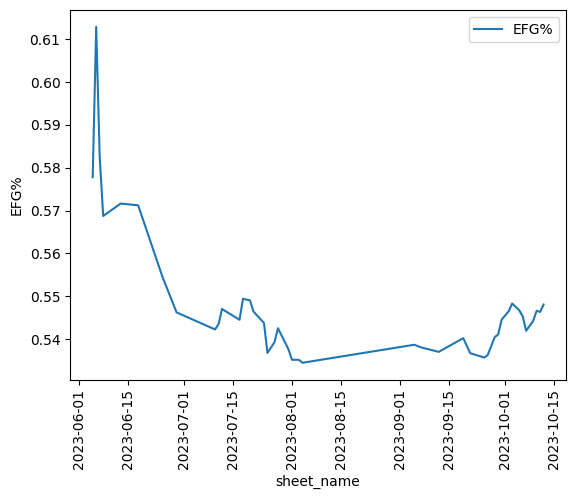

In [13]:
new = all_concat[all_concat['Player Name'] == 'Total']
new['EFG%'] = (new['A 2FGM'].cumsum()+new['B 2FGM'].cumsum()+1.5*(new['3FG'].cumsum()))/(new['A 2FGM'].cumsum()+new['A 2FGm'].cumsum()+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = 'EFG%', label = 'EFG%')

plt.xticks(rotation=90);

In [87]:
#new = new.set_index('sheet_name')
subsets = []
for col in new.columns:
  subset = new[[col]]
  subset.columns = ['val']
  subset['metric'] = col
  subsets.append(subset)
stacked = pd.concat(subsets)
stacked = stacked.reset_index()
stacked = stacked.dropna()

<ipython-input-87-c70f1d76f201>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['metric'] = col
<ipython-input-87-c70f1d76f201>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['metric'] = col
<ipython-input-87-c70f1d76f201>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [88]:
stacked

,sheet_name,val,metric
0,2023-06-05,Total,Player Name
1,2023-06-06,Total,Player Name
2,2023-06-07,Total,Player Name
3,2023-06-08,Total,Player Name
4,2023-06-13,Total,Player Name
...,...,...,...
4111,2023-10-07,26.0,TO F
4112,2023-10-09,34.0,TO F
4113,2023-10-10,30.0,TO F
4114,2023-10-11,24.0,TO F


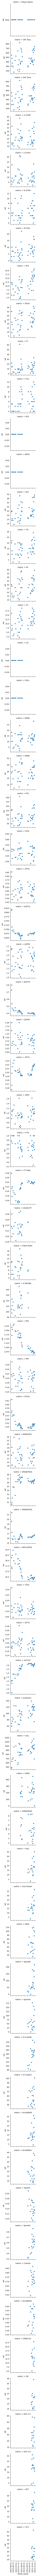

In [90]:
g = sns.FacetGrid(stacked,  row='metric', sharey=False);
plt.xticks(rotation=90);
g.map(sns.scatterplot,'sheet_name','val');
plt.xticks(rotation=90);

<ipython-input-26-c068fc8a5e31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['3PT%'] = new['3FG'].cumsum() / (new['3FG'].cumsum() + new['3FGm'].cumsum())


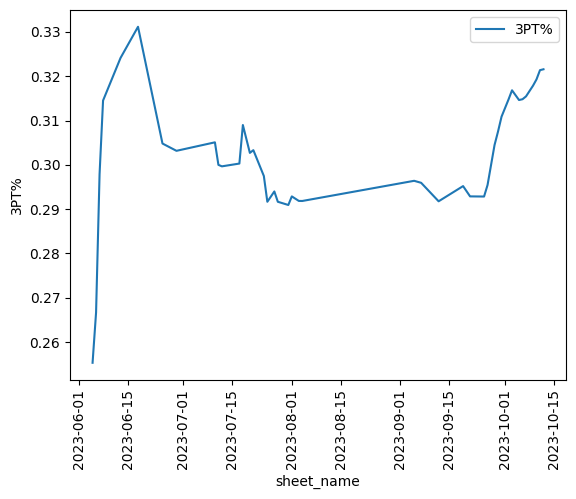

In [26]:
new['3PT%'] = new['3FG'].cumsum() / (new['3FG'].cumsum() + new['3FGm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = '3PT%', label = '3PT%')

plt.xticks(rotation=90);

<ipython-input-27-9c743f83b09d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['A2PT%'] = new['A 2FGM'].cumsum() / (new['A 2FGM'].cumsum() + new['A 2FGm'].cumsum())


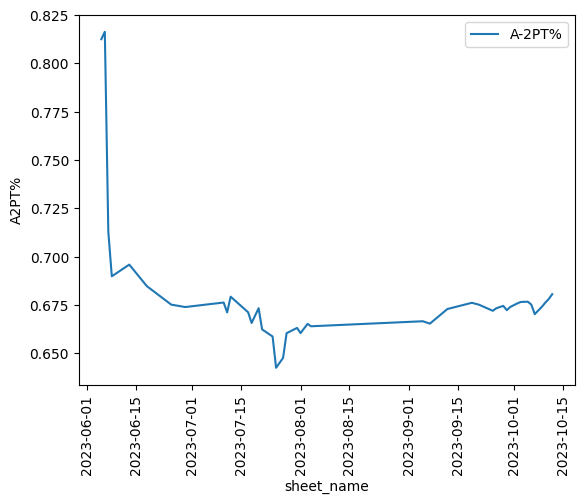

In [27]:
new['A2PT%'] = new['A 2FGM'].cumsum() / (new['A 2FGM'].cumsum() + new['A 2FGm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = 'A2PT%', label = 'A-2PT%')
plt.xticks(rotation=90);

<ipython-input-28-2dd0bf98e92d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['B2PT%'] = new['B 2FGM'].cumsum() / (new['B 2FGM'].cumsum() + new['B FGm'].cumsum())


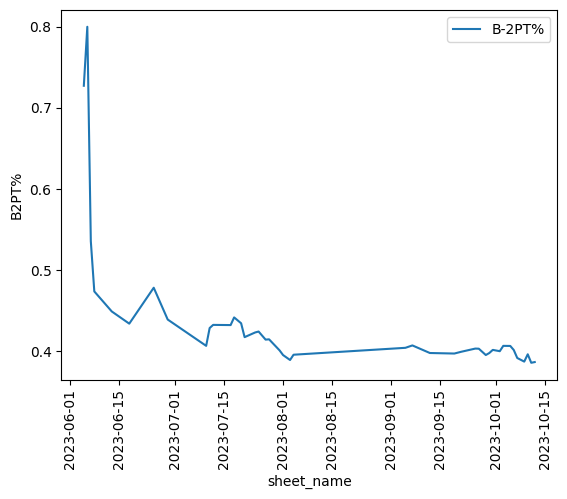

In [28]:
new['B2PT%'] = new['B 2FGM'].cumsum() / (new['B 2FGM'].cumsum() + new['B FGm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = 'B2PT%', label = 'B-2PT%')
plt.xticks(rotation=90);

<ipython-input-29-6e25c05cac6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['PPS'] = new['PTS'].cumsum()/(new['A 2FGM'].cumsum()+new['A 2FGm']+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum()+new['FT'].cumsum()+new['FTm'].cumsum())


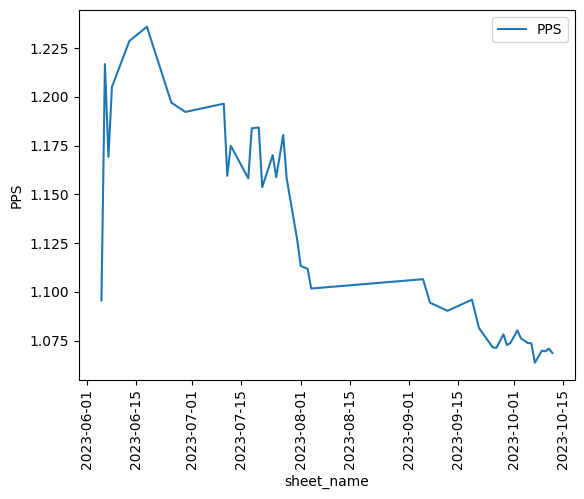

In [29]:
new['PPS'] = new['PTS'].cumsum()/(new['A 2FGM'].cumsum()+new['A 2FGm']+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum()+new['FT'].cumsum()+new['FTm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = 'PPS', label = 'PPS')
plt.xticks(rotation=90);

<ipython-input-31-7660fab6873b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['AST/TO'] = new['AST'].cumsum() / new['TO'].cumsum()


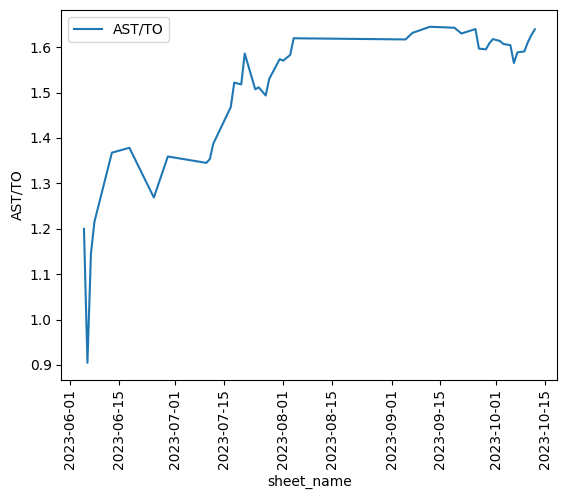

In [31]:
new['AST/TO'] = new['AST'].cumsum() / new['TO'].cumsum()
sns.lineplot(data = new, x = 'sheet_name', y = 'AST/TO', label = 'AST/TO')
plt.xticks(rotation=90);

<ipython-input-32-fd890a9d2caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['OREB/POSS'] = new['Off. Poss.'].cumsum() / new['OREB'].cumsum()


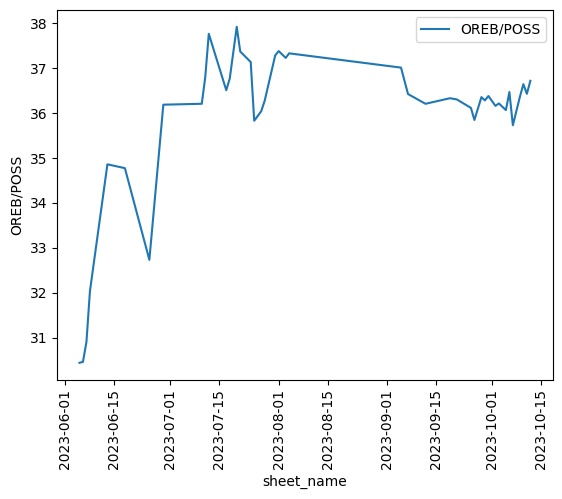

In [32]:
new['OREB/POSS'] = new['Off. Poss.'].cumsum() / new['OREB'].cumsum()
sns.lineplot(data = new, x = 'sheet_name', y = 'OREB/POSS', label = 'OREB/POSS')
plt.xticks(rotation=90);

<ipython-input-33-a8e0a77d839c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['DREB/POSS'] = new['Def. Poss.'].cumsum() / new['DREB'].cumsum()


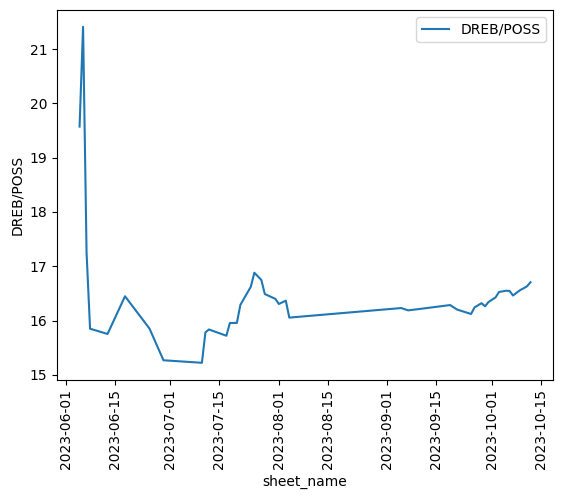

In [33]:
new['DREB/POSS'] = new['Def. Poss.'].cumsum() / new['DREB'].cumsum()
sns.lineplot(data = new, x = 'sheet_name', y = 'DREB/POSS', label = 'DREB/POSS')
plt.xticks(rotation=90);

<ipython-input-34-083dce53061c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['FT Rate'] = (new['FT'].cumsum()+new['FTm'].cumsum())/(new['A 2FGM'].cumsum()+new['A 2FGm']+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum())


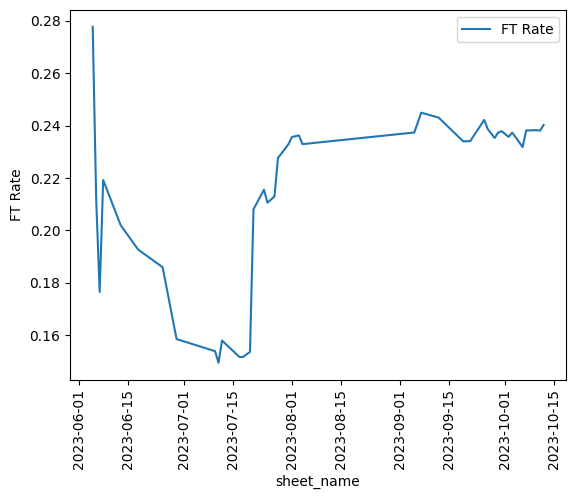

In [34]:
new['FT Rate'] = (new['FT'].cumsum()+new['FTm'].cumsum())/(new['A 2FGM'].cumsum()+new['A 2FGm']+new['B 2FGM'].cumsum()+new['B FGm'].cumsum()+new['3FG'].cumsum()+new['3FGm'].cumsum())
sns.lineplot(data = new, x = 'sheet_name', y = 'FT Rate', label = 'FT Rate')
plt.xticks(rotation=90);

<ipython-input-35-a38ef5386258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['DEFL/POSS'] = new['Def. Poss.'].cumsum() / new['DF'].cumsum()


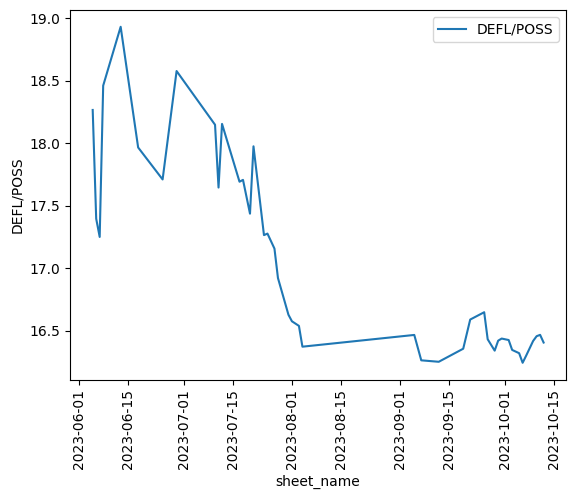

In [35]:
new['DEFL/POSS'] = new['Def. Poss.'].cumsum() / new['DF'].cumsum()
sns.lineplot(data = new, x = 'sheet_name', y = 'DEFL/POSS', label = 'DEFL/POSS')
plt.xticks(rotation=90);

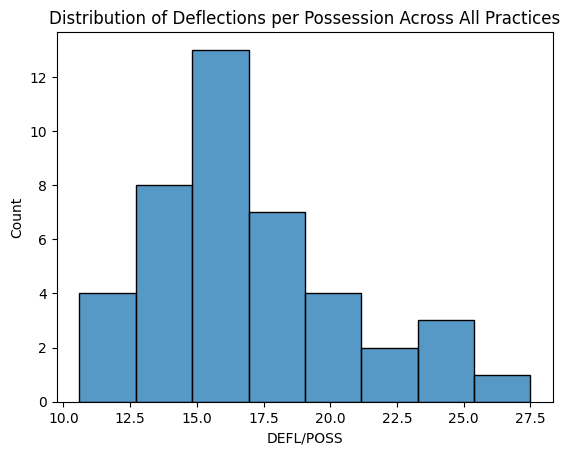

In [41]:
team = all_concat[all_concat['Player Name'] == 'Total']
ax = sns.histplot(data=team, x='DEFL/POSS');
ax.set(title="Distribution of Deflections per Possession Across All Practices");

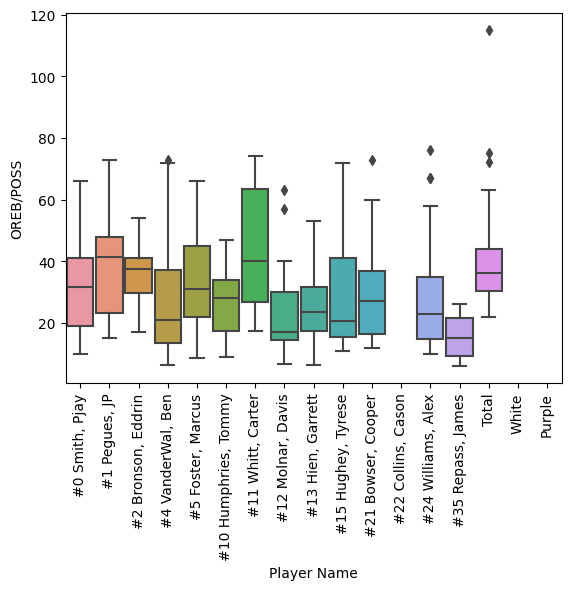

In [72]:
ax2 = sns.boxplot(data = all_concat, y = 'OREB/POSS', x= 'Player Name', width=0.9);
plt.xticks(rotation=90);


<ipython-input-73-914cc7685f29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['3PT%'] = new['3FG'].cumsum() / (new['3FG'].cumsum() + new['3FGm'].cumsum())


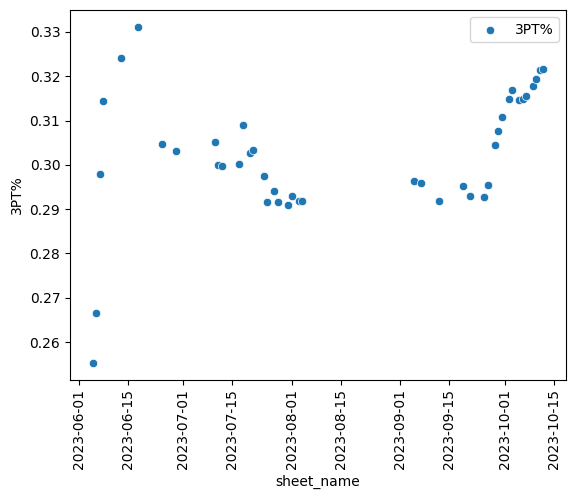

In [73]:
new['3PT%'] = new['3FG'].cumsum() / (new['3FG'].cumsum() + new['3FGm'].cumsum())
sns.scatterplot(data = new, x = 'sheet_name', y = '3PT%', label = '3PT%')

plt.xticks(rotation=90);

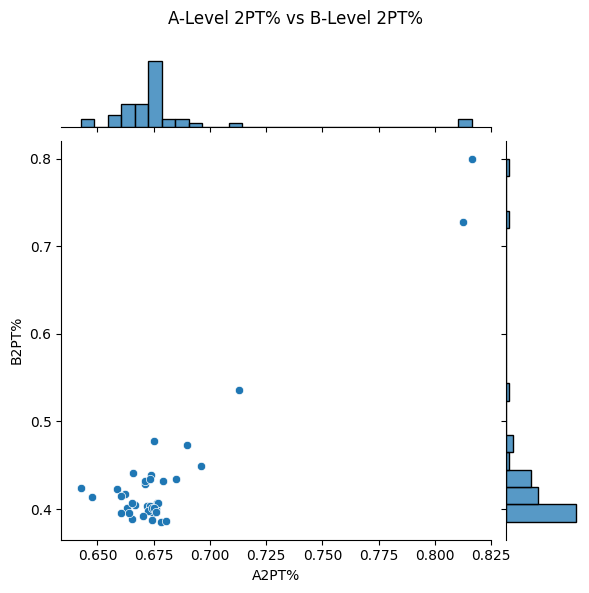

In [76]:
sns.jointplot(data = new, x = 'A2PT%', y = 'B2PT%')
plt.suptitle("A-Level 2PT% vs B-Level 2PT%")
plt.subplots_adjust(top=0.9);

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


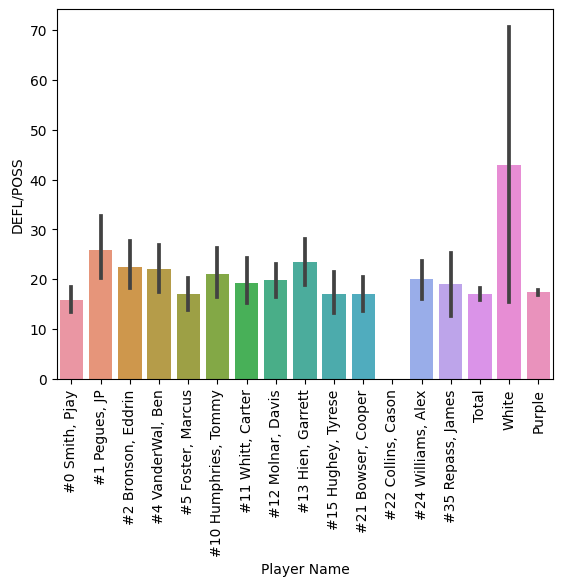

In [78]:
sns.barplot(data = all_concat, y = 'DEFL/POSS', x= 'Player Name');
plt.xticks(rotation=90);